In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.cross_validation import KFold

import scipy.stats as stats
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# Load the loans data
loansData_df = pd.read_csv("../resources/loansData_clean.csv")
loansData_df

,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length
0,20000,20000.00,8.90,36,debt_consolidation,14.90%,SC,MORTGAGE,6541.67,735,14,14272,2,< 1 year
1,19200,19200.00,12.12,36,debt_consolidation,28.36%,TX,MORTGAGE,4583.33,715,12,11140,1,2 years
2,35000,35000.00,21.98,60,debt_consolidation,23.81%,CA,MORTGAGE,11500.00,690,14,21977,1,2 years
3,10000,9975.00,9.99,36,debt_consolidation,14.30%,KS,MORTGAGE,3833.33,695,10,9346,0,5 years
4,12000,12000.00,11.71,36,credit_card,18.78%,NJ,RENT,3195.00,695,11,14469,0,9 years
5,6000,6000.00,15.31,36,other,20.05%,CT,OWN,4891.67,670,17,10391,2,3 years
6,10000,10000.00,7.90,36,debt_consolidation,26.09%,MA,RENT,2916.67,720,10,15957,0,10+ years
7,33500,33450.00,17.14,60,credit_card,14.70%,LA,MORTGAGE,13863.42,705,12,27874,0,10+ years
8,14675,14675.00,14.33,36,credit_card,26.92%,CA,RENT,3150.00,685,9,7246,1,8 years
9,7000,7000.00,6.91,36,credit_card,7.10%,CA,RENT,5000.00,715,8,7612,0,3 years


In [3]:
intrate = loansData_df['Interest.Rate']
loanamt = loansData_df['Amount.Requested']
fico = loansData_df['FICO.Range']

y = np.matrix(intrate).transpose()
x1 = np.matrix(fico).transpose()
x2 = np.matrix(loanamt).transpose()

x = np.column_stack([x1,x2])

In [4]:
# InterestRate = b + a1(FICOScore) + a2(LoanAmount)
X = sm.add_constant(x)
model = sm.OLS(y,X)
f = model.fit()
f.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.657
Model:                            OLS   Adj. R-squared:                  0.656
Method:                 Least Squares   F-statistic:                     2388.
Date:                Wed, 16 Mar 2016   Prob (F-statistic):               0.00
Time:                        07:55:53   Log-Likelihood:                -5785.4
No. Observations:                2500   AIC:                         1.158e+04
Df Residuals:                    2497   BIC:                         1.159e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         72.8828      0.988     73.734      0.000        70.945    74.821
x1            -0.0884      0.001    -63.022      0.000        -0.091    -0.086
x2             0.0002    6.3e-06     33.443      0.000         0.000     0.000
==============================================================================
Omnibus:                       69.496   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               77.811
Skew:                           0.379   Prob(JB):                     1.27e-17
Kurtosis:                       3.414   Cond. No.                     2.96e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.96e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [5]:
# InterestRate = b + a1(FICOScore) + a2(LoanAmount)
pct_70 = int(len(loansData_df) * 0.7)

train_intrate = intrate[:pct_70] 
train_loanamt = loanamt[:pct_70]
train_fico = fico[:pct_70]

test_intrate = intrate[pct_70:]
test_loanamt = loanamt[pct_70:]
test_fico = fico[pct_70:]

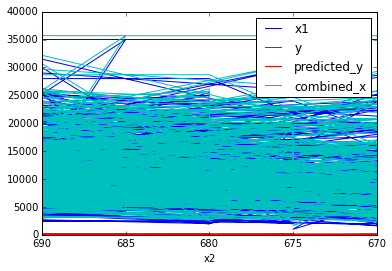

In [12]:
test_df = pd.DataFrame({'y': test_intrate, 'x1': test_loanamt, 'x2':test_fico})

train_df = pd.DataFrame({'y': train_intrate, 'x1': train_loanamt, 'x2':train_fico})
linear_fit = smf.ols(formula='y ~ 1 + x1 + x2', data=train_df).fit()
#graph = pd.scatter_matrix(train_df)
linear_fit.summary()

def testData(x):
    return (0.002 * x['x1'] + -0.0886 * x['x2'] + 73.0641)

test_df['predicted_y'] = test_df.apply(testData, axis=1)
test_df['combined_x'] = test_df['x1'] + test_df['x2']
test_df.set_index('x2').plot()